In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from itertools import product

# Producing Tables

In [ ]:
p_s = [500]
d_s = [4]
list_all = []

for p in p_s:
  for d in d_s:
    with open("df_performance_applam_n1000_p{0}_d{1}.csv".format(p,d), newline='') as my_csv_applam:
        df_applam = pd.read_csv(my_csv_applam)
        df_applam = df_applam.iloc[: , 1:]
        df_applam = df_applam.loc[:, ['model', 'p', 'd', 'intensity', 'mode_nclus', 'avg_nclus', 'ari_best_clus']]
        df_applam = df_applam.rename(columns={'intensity': 'parameter'})


    list_all.append(df_applam)

df_all = pd.concat(list_all)
df_all.to_csv("df_all_results_table_n1000.csv")

In [ ]:
p_s = [500]
d_s = [4]
rho_s = [0.05, 0.1, 0.2]

### Produce one csv for each d (two different choices)





In [ ]:
with open("df_all_results_table_n1000.csv", newline='') as my_csv_all:
        df_all = pd.read_csv(my_csv_all)

d = 4
data = df_all.loc[df_all['d']==d]

data_agg = data.groupby(['p','model', 'parameter']).agg(
    avg_avg_nclus = pd.NamedAgg(column = 'avg_nclus', aggfunc = np.mean),
    avg_mode_nclus = pd.NamedAgg(column = 'mode_nclus', aggfunc = np.mean),
    avg_ari_best = pd.NamedAgg(column = 'ari_best_clus', aggfunc = np.mean)
)


ar_ind = []

for p in p_s:

  ar_app = [np.repeat("APPLAM",3),rho_s]
  ar_app = list(zip(*ar_app))

  ar_ind = [*ar_ind, *ar_app]


index = pd.MultiIndex.from_tuples(ar_ind, names=[ "Model", "Parameter"])

df_final = data_agg.set_index(index)

df_final.to_csv("summarizing_dataframe_n1000_d_{0}.csv".format(d))



### Produce the table in latex format

In [ ]:
for d in d_s:
    with open("summarizing_dataframe_n1000_d_{0}.csv".format(d), newline='') as my_csv:
        df = pd.read_csv(my_csv, index_col=[0,1])

    df["avg_avg_nclus"] = df["avg_avg_nclus"].round(2)
    df["avg_mode_nclus"] = df["avg_mode_nclus"].round(2)

    df["avg_ari_best"] = df["avg_ari_best"].round(2)

    print("d = ",d)

    print(df.to_latex())

d =  4
\begin{tabular}{llrrr}
\toprule
       &      &  avg\_avg\_nclus &  avg\_mode\_nclus &  avg\_ari\_best \\
Model & Parameter &                &                 &               \\
\midrule
APPLAM & 0.05 &           2.80 &            2.80 &          0.62 \\
       & 0.10 &           3.26 &            3.25 &          0.68 \\
       & 0.20 &           4.44 &            4.45 &          0.71 \\
\bottomrule
\end{tabular}



<ipython-input-8-36d59281735a>:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


# Producing boxplots

In [ ]:
p_s = [500]
d_s = [4]
list_all = []

for p in p_s:
  for d in d_s:
    with open("df_performance_applam_n1000_p{0}_d{1}.csv".format(p,d), newline='') as my_csv_applam:
        df_applam = pd.read_csv(my_csv_applam)
        df_applam = df_applam.iloc[: , 1:]
        df_applam = df_applam.loc[:, ['model', 'p', 'd', 'intensity', 'mode_nclus', 'avg_nclus', 'ari_best_clus']]


    list_all.append(df_applam)

df_all = pd.concat(list_all)
df_all.to_csv("df_all_results_plot_n1000.csv")

### Plot the boxplots

In [2]:
import seaborn as sns
with open("df_all_results_plot_n1000.csv", newline='') as my_csv_all:
        df_all = pd.read_csv(my_csv_all)


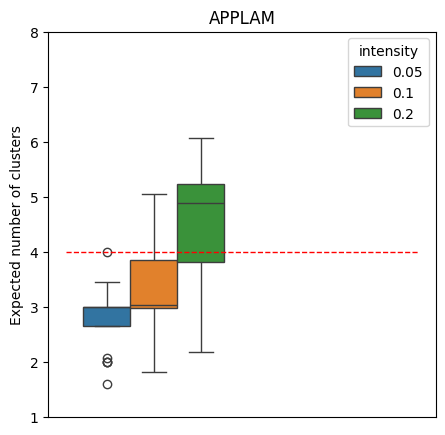

In [5]:
plt.figure(figsize=(5,5))

d=4

# APPLAM row
ax1 = sns.boxplot(data = df_all,
            y = 'avg_nclus',
            hue = 'intensity',
            palette = 'tab10')
ax1.set(ylabel='Expected number of clusters')
ax1.set(xlabel = None)
ax1.tick_params(bottom=False)
ax1.set(ylim=(1, 8))
ax1.set(title = "APPLAM")
ax1.hlines(y = 4, xmin = -0.5, xmax = 1.5, color = 'red', linestyle ='dashed', linewidth = 1)




plt.savefig("Nclus_n1000.pdf", format="pdf", bbox_inches="tight")


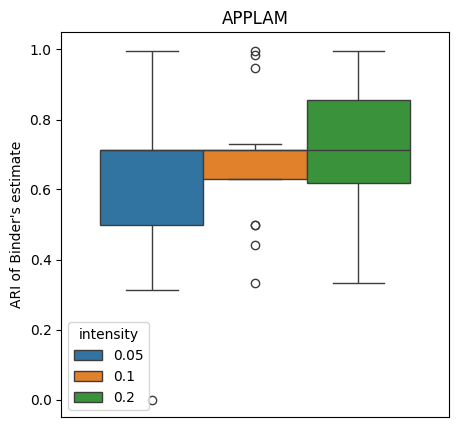

In [6]:
plt.figure(figsize=(5,5))

d= 4

# APPLAM row
ax1 = sns.boxplot(data = df_all,
            y = 'ari_best_clus',
            hue = 'intensity',
            palette = 'tab10')
ax1.set(ylabel='ARI of Binder\'s estimate')
ax1.set(xlabel = None)
ax1.tick_params(bottom=False)
ax1.set(ylim=(-0.05, 1.05))
ax1.set(title = "APPLAM")



plt.savefig('Aris_n1000.pdf'.format(d),format="pdf", bbox_inches="tight")
